**Table of Content**

1. **[Libraies](#import_lib)**
2. **[Exploratory Data Analysis](#eda)**
3. **[Feature Pre-Processsing & Engineering](#fpe)**
4. **[Model Building](#modles)**
5. **[Discussion and Reuslts](#results)**
6. **[Test Set Prediction](#testset)**

### **Libraries** <a id='import_lib'></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

pd.options.display.max_columns = None
pd.options.display.max_rows = None

from warnings import filterwarnings
filterwarnings('ignore')

sns.set_theme()
plt.rcParams['figure.figsize'] = [15,5]

### **Exploratory Data Analysis** <a id='eda'></a>

In [2]:
dir_path = "assignment-DS/"

In [3]:
train = pd.read_csv(dir_path + 'train.csv')
test = pd.read_csv(dir_path + 'test.csv')

In [4]:
train.shape, test.shape

((1460, 81), (1459, 80))

In [5]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Before any further analysis, let's drop the ID column.

In [6]:
train.drop('Id', axis=1, inplace=True)

In [7]:
train.dtypes

MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object
HeatingQC         object


In [8]:
print(f'There are {train.shape[0]} data points and {train.shape[1]} features in the trainset')
print(f'There are {test.shape[0]} data points and {test.shape[1]} features in the testset')

There are 1460 data points and 80 features in the trainset
There are 1459 data points and 80 features in the testset


In [9]:
print(f'Numerical Features: {train.select_dtypes(include=[np.number]).shape[1]}')
print(f'Categorical Features: {train.select_dtypes(include=["object"]).shape[1]}')

Numerical Features: 37
Categorical Features: 43


In [10]:
train.describe(include=np.number)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


1. Minmum SalePrice of a house is 34900 and 755000 maximum
2. The oldest house is from year 1872 and the most recent built is from 2010.

In [11]:
train.describe(include='object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1460,1452,1460,1460,1460,1423,1423,1422,1423,1422,1460,1460,1460,1459,1460,1460,770,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,8,5,8,6,8,15,16,4,4,5,6,4,4,4,6,6,6,5,2,5,4,7,5,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,Gable,CompShg,VinylSd,VinylSd,None,TA,TA,PConc,TA,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,TA,Typ,Gd,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,1445,1220,726,1141,1434,515,504,864,906,1282,647,649,1311,953,430,1256,1428,741,1365,1334,735,1360,380,870,605,1311,1326,1340,3,157,49,1267,1198


1. Most house supports(1428) GasA heating i.e. Gas forced warm air furnace
2. SaleType is WD(Warranty Deed - Conventional) for most of the houses.
3. Most house have Garage attached to home
4. 380 house have FireplaceQu Good - Masonry Fireplace in main level.

Before further EDA, let's just check the distribution of `Price` which is our target variable.

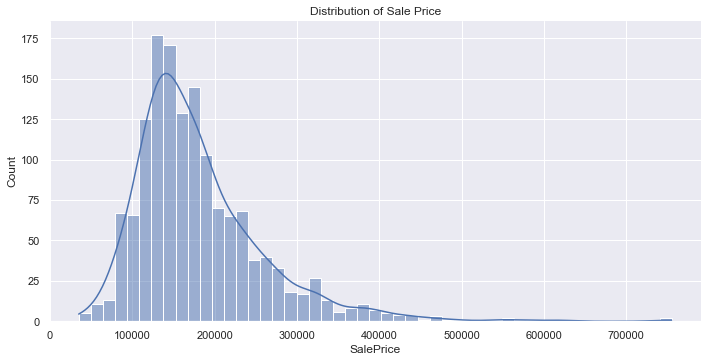

In [12]:
sns.displot(train.SalePrice, kde=True,  height=5, aspect=2)
plt.title('Distribution of Sale Price')
plt.show()

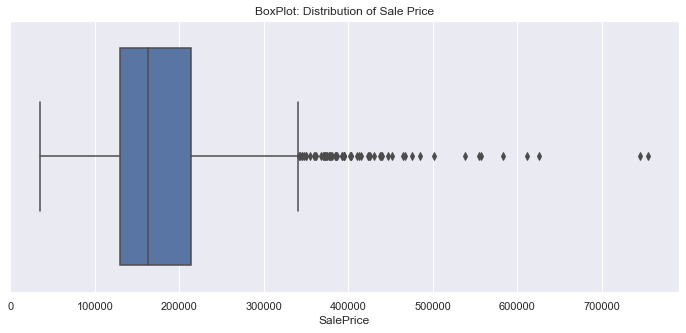

In [13]:
plt.figure(figsize=(12,5))

sns.boxplot(x = 'SalePrice' , data = train)
plt.title('BoxPlot: Distribution of Sale Price')
plt.show()

In [14]:
print(f"Skewness of train set {round(train.SalePrice.skew(),2)}")
print(f"Kurtosis of train set {round(train.SalePrice.kurt(),2)}")

Skewness of train set 1.88
Kurtosis of train set 6.54


Target variable is rightly(+ve) skewed.

In [15]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


**Distribution of Numerical features**

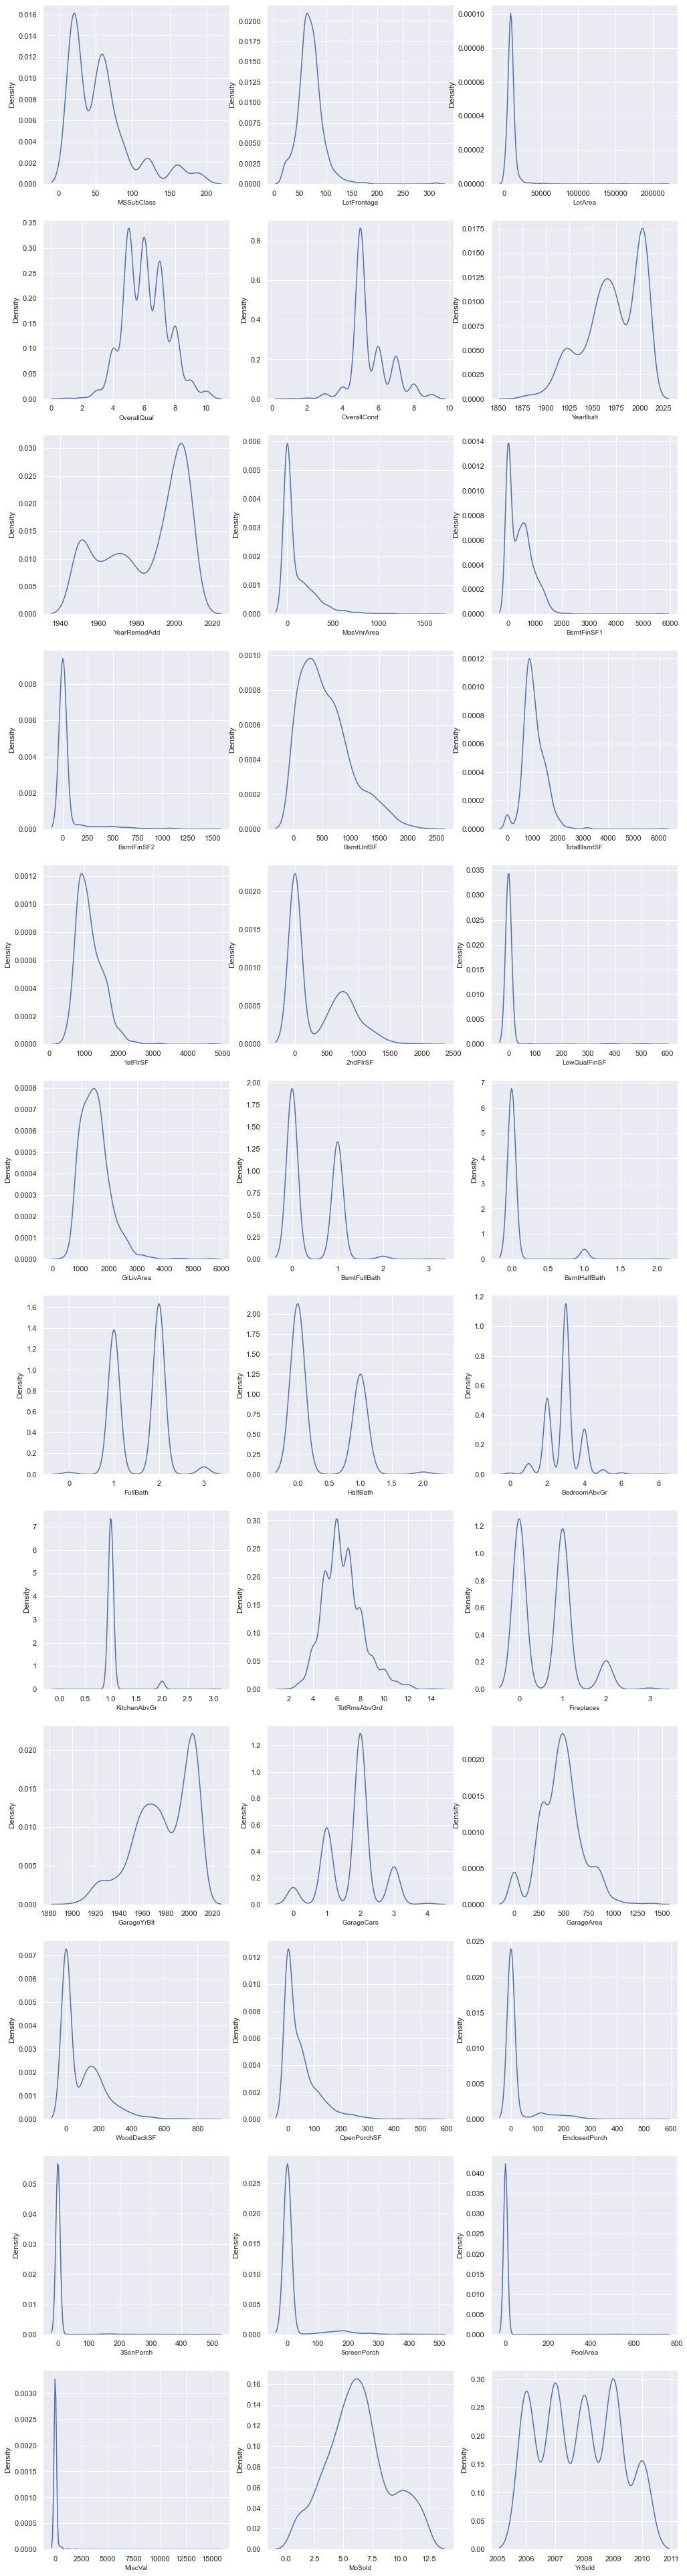

In [16]:
data_num = train.drop('SalePrice', axis=1).select_dtypes(include=[np.number])

fig,ax= plt.subplots(nrows=12,ncols=3,figsize=(17, 70)) 
for variable, subplot in zip(data_num.columns,ax.flatten()):
    z = sns.kdeplot(x = data_num[variable] , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)

plt.show()

1. As we can see 8 different features are left skewed, such as MiscVal, PoolArea
2. Others are kind of normally distributed such as OverallQual (overall material and finish of the house) whcih is most important.

**Distribution of class in categorical features**

In [17]:
categorical_features = [ 'MSZoning','Street', 'Alley','LotShape', 'LandContour','Utilities','LotConfig','LandSlope','Condition1','Condition2','BldgType',
                        'HouseStyle','RoofStyle','RoofMatl','Exterior1st','MasVnrType','ExterQual','ExterCond',
                        'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
                        'Heating','HeatingQC','CentralAir','Electrical','KitchenQual','Functional','FireplaceQu','GarageType',
                        'GarageFinish','GarageQual','GarageCond','PavedDrive','PoolQC','Fence','MiscFeature','SaleType','SaleCondition','Exterior2nd','Neighborhood',]

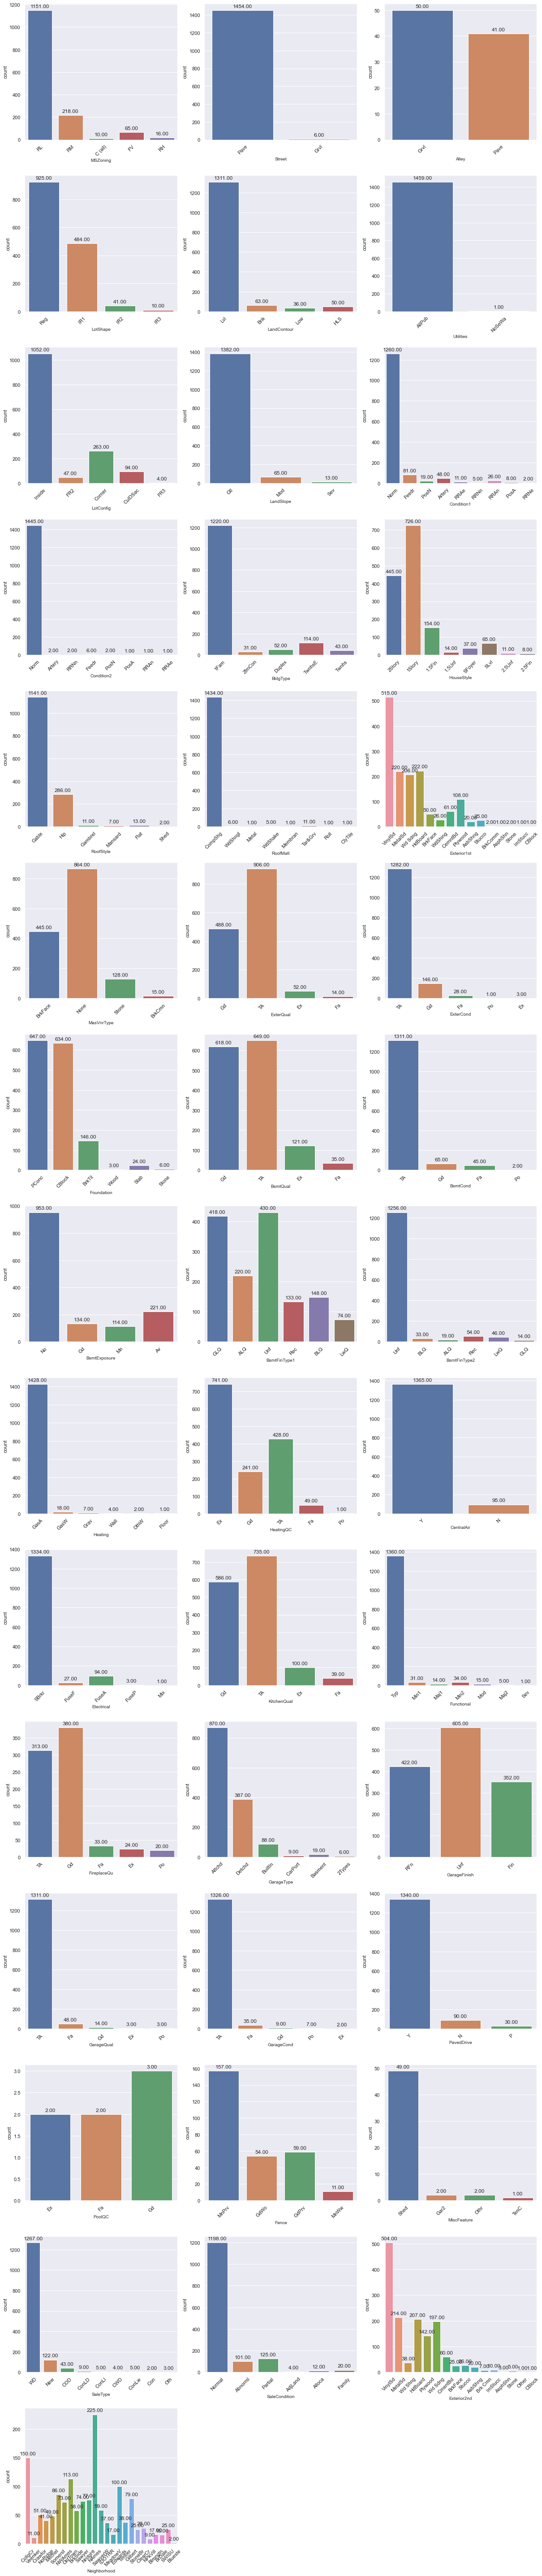

In [18]:
fig,ax= plt.subplots(nrows=15,ncols=3,figsize=(17, 80)) 

for variable, subplot in zip(train[categorical_features].columns,ax.flatten()):
    z = sns.countplot(x = train[categorical_features][variable],ax=subplot, ) 
    z.set_xlabel(variable, fontsize = 10)
    z.set_xticklabels(z.get_xticklabels(), rotation=45)
    for p in z.patches:
      z.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', xytext = (0, 6), textcoords = 'offset points')
  
fig.delaxes(ax[14][1])
fig.delaxes(ax[14][2])
plt.tight_layout()

Above plots shows the class distribution in the categorical features.

**Relationship of Target Variable with numerical variables**

In [19]:
num_features  = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt', 'SalePrice']

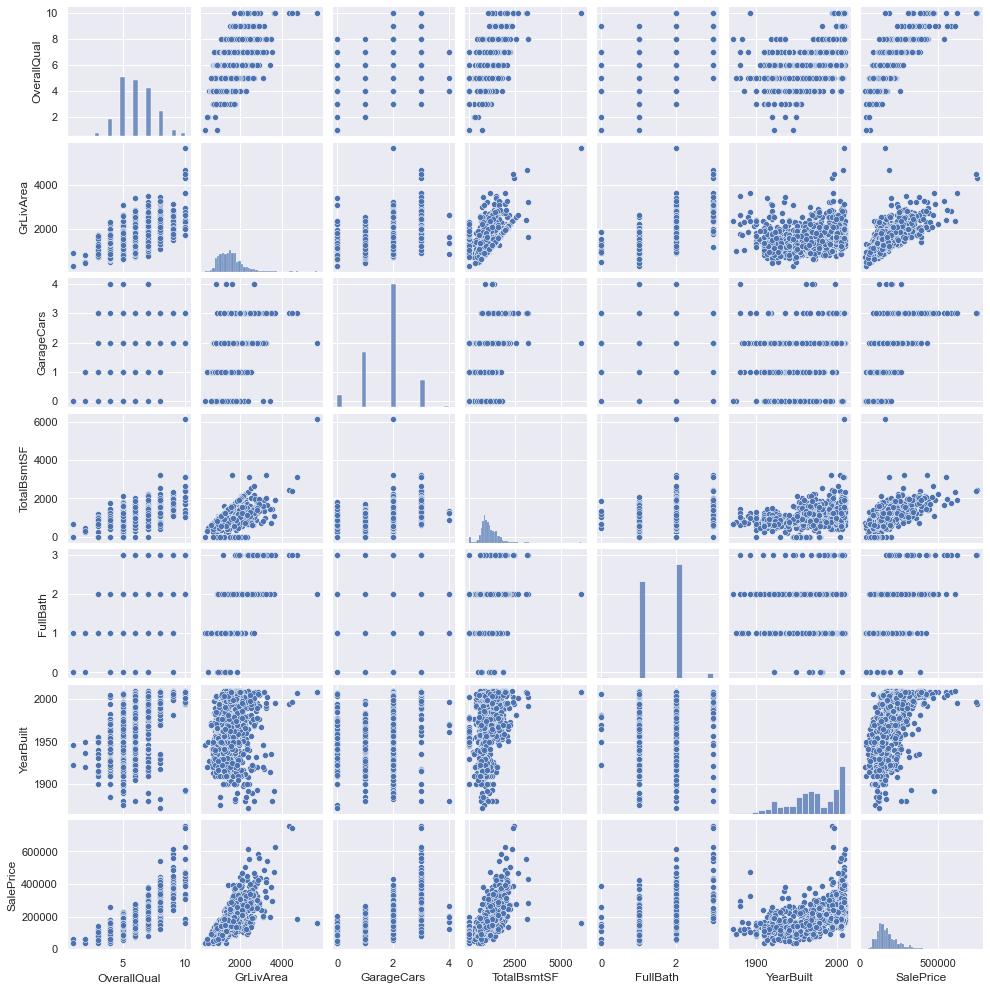

In [20]:
sns.pairplot(train[num_features], height=2)
plt.show()

GrLivarea, TotalBsmtSF, and YearBuilt have kind of linear relationship with the target variable.

**Heatmap of the correlation of numerical features**

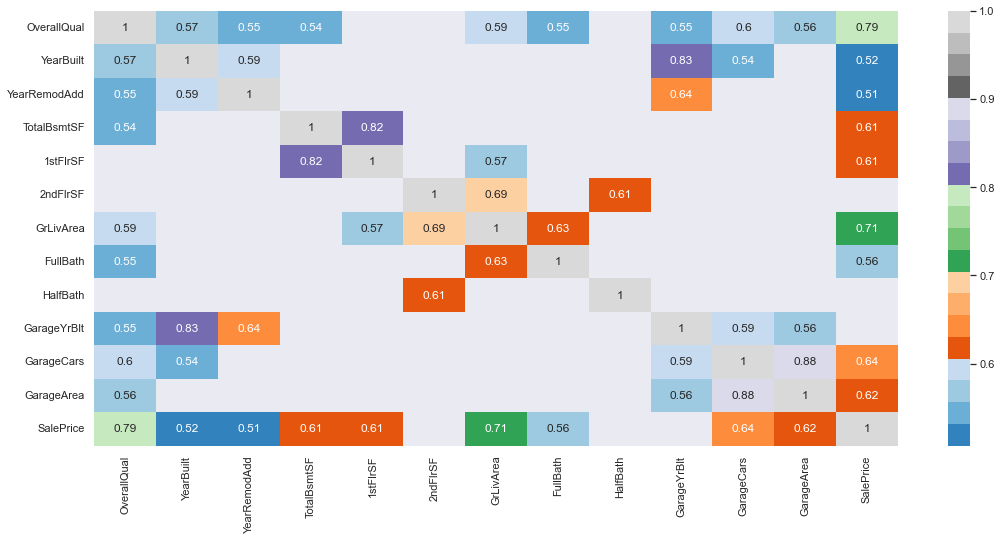

In [21]:
features = ['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'FullBath',
'HalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']

plt.figure(figsize=(18,8))
sns.heatmap(train[features].corr()[abs(train[features].corr()) > .5], annot=True, cmap='tab20c')
plt.show()

GarageArea, GarageCars, GrLivArea, OverallQual, TotalBsmtSF etc. have the correlation of more than .6 with the target variable.

**Relationship of Target Variable with categorical variables**

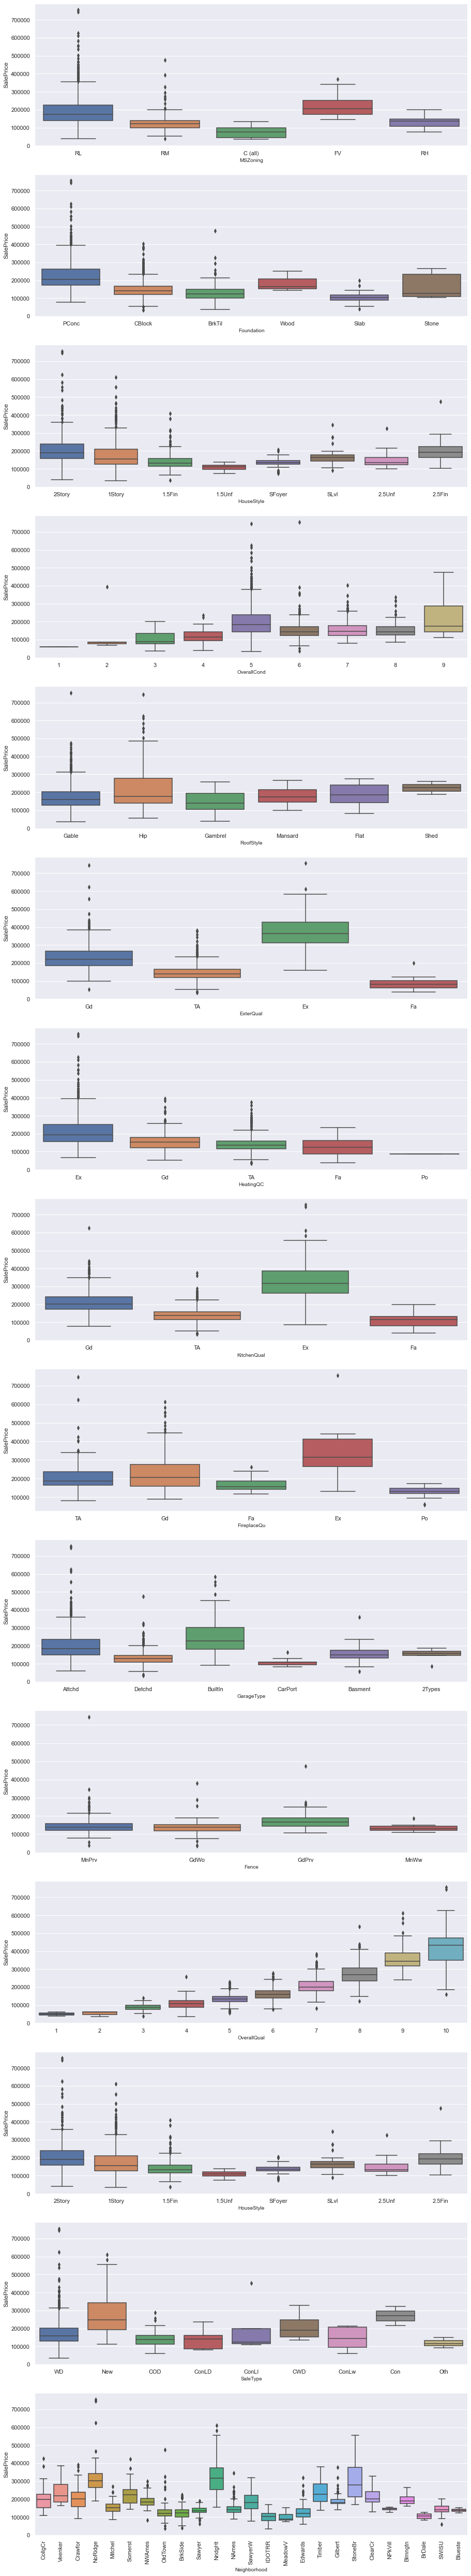

In [22]:
features = ['MSZoning', 'Foundation', 'HouseStyle', 'OverallCond', 'RoofStyle','ExterQual', 'HeatingQC',
            'KitchenQual','FireplaceQu','GarageType', 'Fence', 'OverallQual', 'HouseStyle', 'SaleType', 'Neighborhood']

fig, ax =  plt.subplots(nrows=15,ncols=1,figsize=(15,90))

for variable, subplot in zip(train[features].columns,ax.flatten()):
  z = sns.boxplot(x= train[variable] , y = 'SalePrice', data=train , ax=subplot) 
  z.set_xlabel(variable, fontsize = 10)

z.set_xticklabels(z.get_xticklabels(), rotation=90)
plt.show()

There are multiple reasons for a house to be expensive, and some of them are following:

1. House is in the Northridge Heights Neighborhood
2. House is located in Residential Low Density zone
3. House having kitchen quality Excellent
4. House just constructed and sold

**Missing vlaues**

In [23]:
missing_values = pd.DataFrame({
    'missing_values':train.isnull().sum(),
    'percentage':train.isnull().sum()*100/train.shape[0]
})

missing_values.sort_values(by='missing_values', ascending=False)[:20]

,missing_values,percentage
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
FireplaceQu,690,47.260274
LotFrontage,259,17.739726
GarageYrBlt,81,5.547945
GarageCond,81,5.547945
GarageType,81,5.547945
GarageFinish,81,5.547945


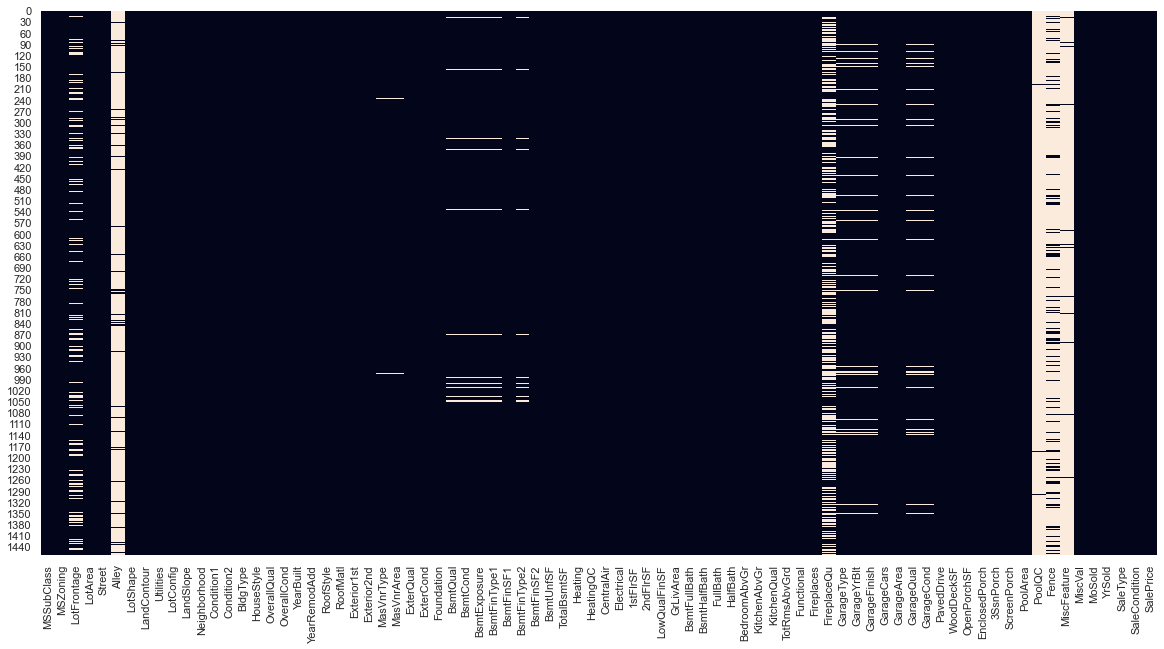

In [24]:
plt.figure(figsize=(20,10))
sns.heatmap(train.isnull(), cbar=False)
plt.show()

Following features have missing values more than 50%

1. PoolQC 
2. MiscFeature
3. Alley
4. Fence

**OutLiers**

In [25]:
df_num=train.select_dtypes(include=[np.number]) 

Q1 = train.quantile(0.25) 
Q3 = train.quantile(0.75) 
IQR = Q3 - Q1 

outlier = pd.DataFrame((df_num < (Q1 - 1.5 * IQR)) | (df_num > (Q3 + 1.5 * IQR)))
for i, j in enumerate(outlier.columns):
    print(i , f'Total number of Outliers in column {j} are {len(outlier[outlier[j] == True][j])}')

0 Total number of Outliers in column MSSubClass are 103
1 Total number of Outliers in column LotFrontage are 88
2 Total number of Outliers in column LotArea are 69
3 Total number of Outliers in column OverallQual are 2
4 Total number of Outliers in column OverallCond are 125
5 Total number of Outliers in column YearBuilt are 7
6 Total number of Outliers in column YearRemodAdd are 0
7 Total number of Outliers in column MasVnrArea are 96
8 Total number of Outliers in column BsmtFinSF1 are 7
9 Total number of Outliers in column BsmtFinSF2 are 167
10 Total number of Outliers in column BsmtUnfSF are 29
11 Total number of Outliers in column TotalBsmtSF are 61
12 Total number of Outliers in column 1stFlrSF are 20
13 Total number of Outliers in column 2ndFlrSF are 2
14 Total number of Outliers in column LowQualFinSF are 26
15 Total number of Outliers in column GrLivArea are 31
16 Total number of Outliers in column BsmtFullBath are 1
17 Total number of Outliers in column BsmtHalfBath are 82
18 

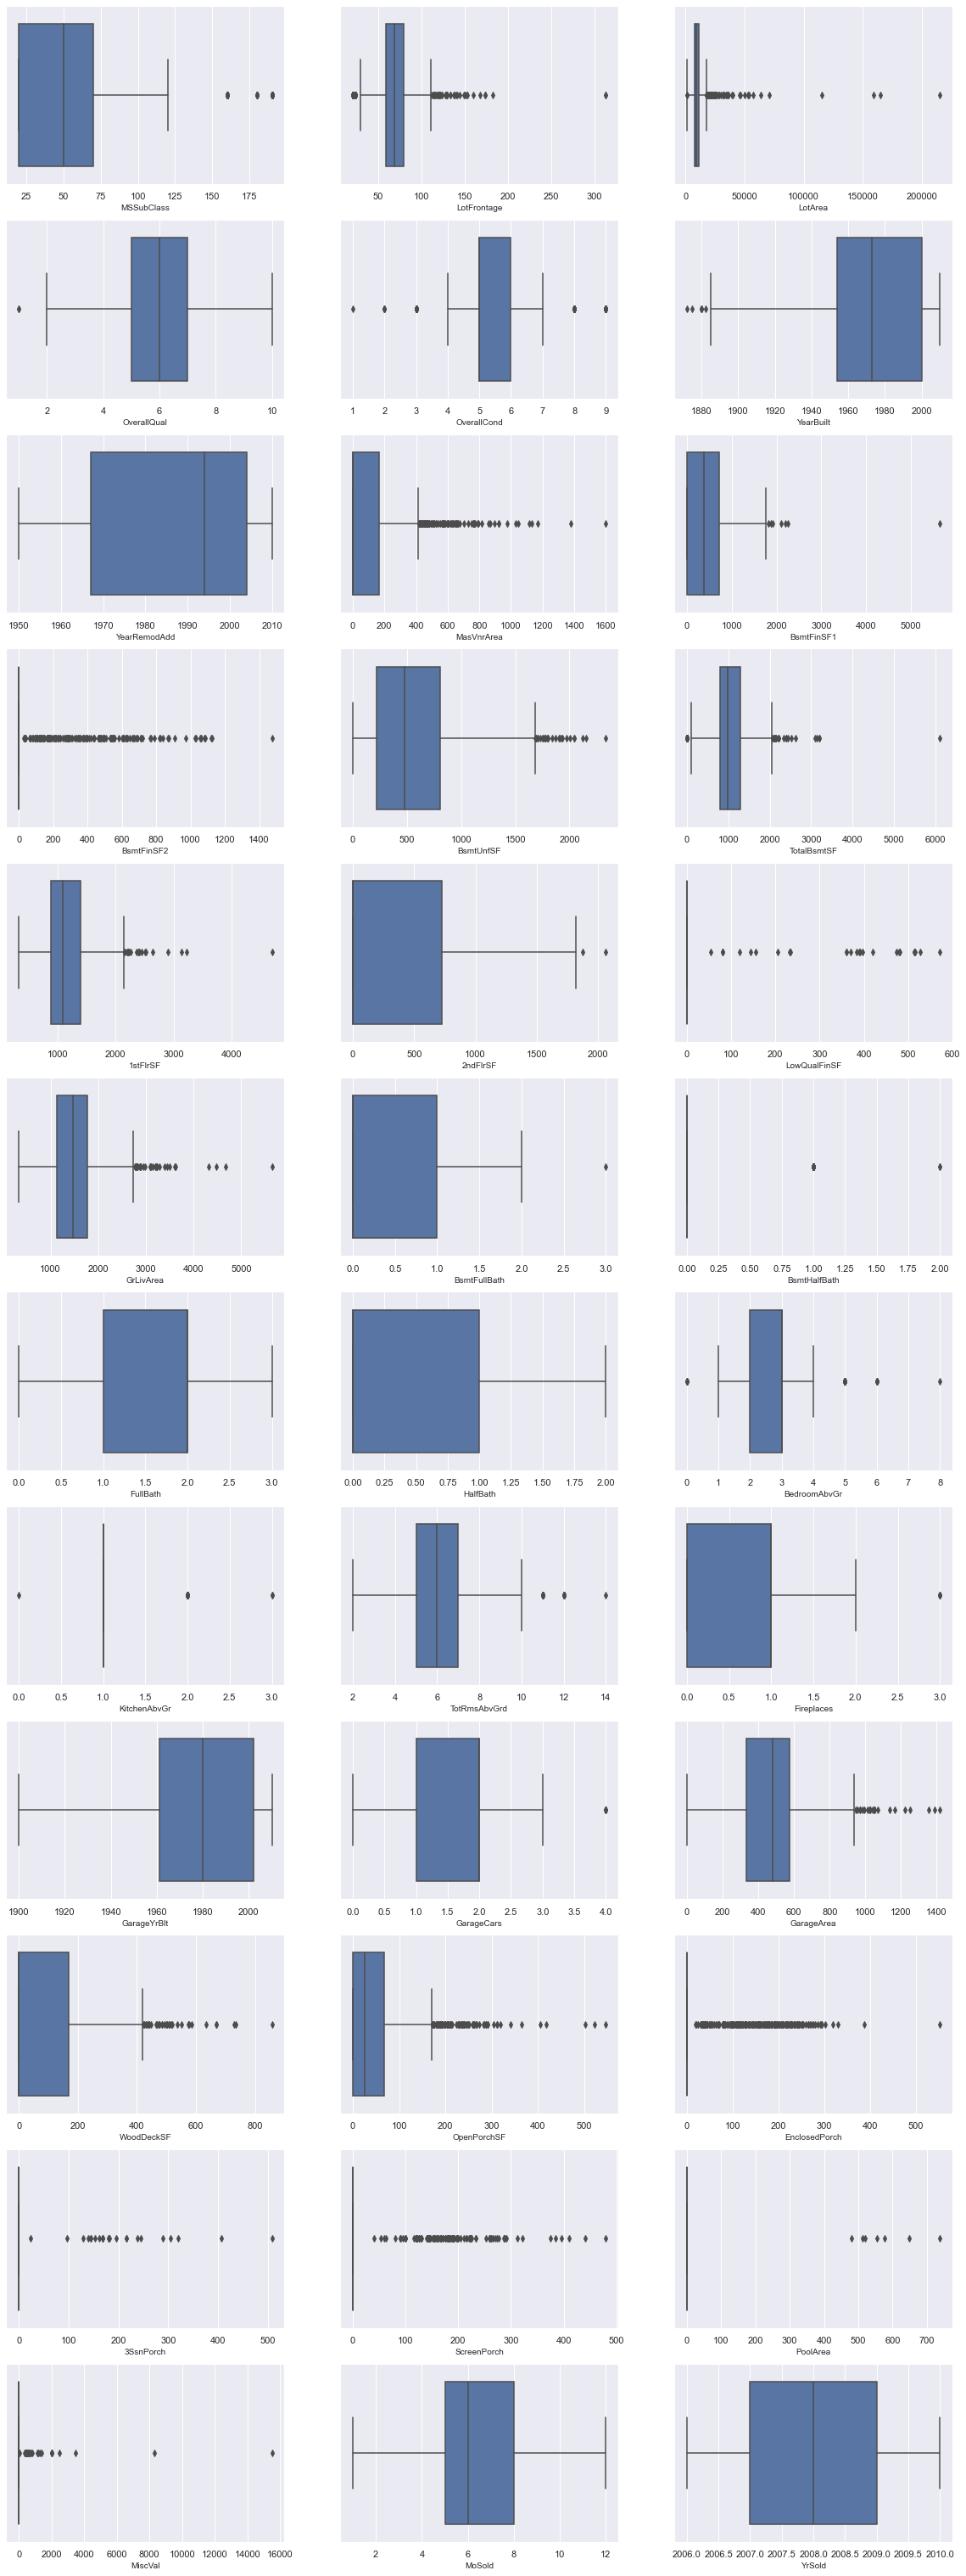

In [26]:
fig,ax= plt.subplots(nrows=12,ncols=3,figsize=(20, 55)) 
for variable, subplot in zip(df_num.columns,ax.flatten()):
    z = sns.boxplot(x = df_num[variable], orient = "h",whis=1.5 , ax=subplot) 
    z.set_xlabel(variable, fontsize = 10)
    
plt.show()

There are some features which have outliers, and we can fix them by scaling down as we cant remove due to the data limit.

### **Feature Pre-Processsing & Engineering** <a id='fpe'></a>

**Removing Outliers**

In [27]:
train = train[train.GrLivArea < 4500]
train.reset_index(drop=True, inplace=True)

**Removing NULL Values**

Following features have more or around ~50% of data as missing values, so we'll drop them.

1. PoolQC
2. MiscFeature	
3. Alley 
4. Fence
5. FireplaceQu

In [28]:
def imputemissing(dataframe):

  dataframe.drop(['PoolQC','MiscFeature','Alley','Fence', 'FireplaceQu'], axis=1, inplace=True)

  for i in dataframe.select_dtypes(include='object').columns:
    dataframe[i].fillna(dataframe[i].mode()[0], inplace=True)

  for i in dataframe.select_dtypes(include=np.number).columns:
    dataframe[i].fillna(dataframe[i].median(), inplace=True)

  return dataframe

In [29]:
train = imputemissing(train)

---

In [30]:
def transform_feature(dataframe):
    
    dataframe = dataframe.drop(['Utilities', 'Street',], axis=1)

    dataframe['YrBltAndRemod']=dataframe['YearBuilt']+dataframe['YearRemodAdd']
    dataframe['TotalSF']=dataframe['TotalBsmtSF'] + dataframe['1stFlrSF'] + dataframe['2ndFlrSF']
    dataframe['Total_sqr_footage'] = (dataframe['BsmtFinSF1'] + dataframe['BsmtFinSF2'] + dataframe['1stFlrSF'] + dataframe['2ndFlrSF'])
    dataframe['Total_Bathrooms'] = (dataframe['FullBath'] + (0.5 * dataframe['HalfBath']) + dataframe['BsmtFullBath'] + (0.5 * dataframe['BsmtHalfBath']))
    dataframe['Total_porch_sf'] = (dataframe['OpenPorchSF'] + dataframe['3SsnPorch'] + dataframe['EnclosedPorch'] + dataframe['ScreenPorch'] + dataframe['WoodDeckSF'])
    
    dataframe['haspool'] = dataframe['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    dataframe['has2ndfloor'] = dataframe['2ndFlrSF'].apply(lambda x: 1 if x > 0 else 0)
    dataframe['hasgarage'] = dataframe['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    dataframe['hasbsmt'] = dataframe['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    dataframe['hasfireplace'] = dataframe['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    
    return dataframe

In [31]:
train = transform_feature(train)

In [32]:
train.shape

(1458, 83)

-----

In [33]:
X =  train.drop(['SalePrice'], axis=1)
y =  train['SalePrice']

In [34]:
df_num = X.select_dtypes(include=np.number)
df_cat = X.select_dtypes(include='object')

**Scaling Numerical Features**

In [35]:
scaler = StandardScaler()

df_num_scaled = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

**Encoding Categorical Features**

In [36]:
labelencoder = LabelEncoder() 

for i in df_cat[['Neighborhood', 'Exterior2nd', 'Exterior1st']].columns:
  df_cat[i] = labelencoder.fit_transform(df_cat[i]) 
  df_cat[i] = labelencoder.fit_transform(df_cat[i]) 
  df_cat[i] = labelencoder.fit_transform(df_cat[i]) 

In [37]:
data_encoded = pd.get_dummies(df_cat, drop_first=True)

In [38]:
df = pd.concat([df_num_scaled,data_encoded], axis=1)

In [39]:
df.shape

(1458, 189)

In [40]:
df.sample(5)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,YrBltAndRemod,TotalSF,Total_sqr_footage,Total_Bathrooms,Total_porch_sf,haspool,has2ndfloor,hasgarage,hasbsmt,hasfireplace,Neighborhood,Exterior1st,Exterior2nd,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
820,-0.871868,-0.459024,-0.452518,-1.521891,-1.416141,-0.603580,-1.542744,-0.570739,-1.013878,-0.288867,0.834745,-0.280920,-0.599204,-0.794354,-0.120325,-1.131497,-0.819502,-0.241236,-1.025620,-0.760202,-1.061532,-0.211605,-1.554469,-0.952231,-0.189705,0.313159,0.489945,-0.750831,-0.218187,1.472417,-0.11642,-0.270407,-0.063709,-0.087748,-1.601578,0.891178,-1.098950,-0.885385,-1.456781,-1.545920,-0.235860,-0.064282,-0.871060,0.242536,0.161363,-1.055009,17,8,8,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
520,3.145628,-0.459024,0.034504,-1.521891,1.279334,-2.359513,0.734975,-0.570739,-1.013878,-0.288867,-1.283211,-2.537212,-1.249896,0.584086,-0.120325,-0.426362,-0.819502,-0.241236,0.793546,-0.760202,0.163894,4.325456,0.302742,-0.952231,0.060489,-2.364762,-2.224904,1.004857,1.037738,3.075435,-0.11642,-0.270407,-0.063709,-0.087748,0.621269,0.138375,-1.230687,-1.632305,-0.961998,-0.265630,2.327137,-0.064282,1.148027,-4.123106,-6.197209,-1.055009,17,8,8,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0

In [41]:
df.shape, y.shape

((1458, 189), (1458,))

In [42]:
pd.concat([df, y], axis=1).to_csv('processed_house_price.csv', index=False)

### **Model Building** <a id='models'></a>

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.33, random_state=42)

In [44]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((976, 189), (482, 189), (976,), (482,))

------

In [45]:
cols = ['Model_Name', 'RMSE', 'RMSLE']
result_table = pd.DataFrame(columns = cols)

In [46]:
lasso = Lasso(alpha =0.0005, random_state=1)

lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


model_metrics = pd.Series({'Model_Name': "Lasso", 'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,'RMSLE': '-'})
result_table = result_table.append(model_metrics, ignore_index = True)

In [47]:
ENet = ElasticNet(alpha=0.0005, l1_ratio=.9, random_state=3)

ENet.fit(X_train, y_train)
y_pred = ENet.predict(X_test)

model_metrics = pd.Series({'Model_Name': "ElasticNet", 'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,'RMSLE': '-'})
result_table = result_table.append(model_metrics, ignore_index = True)

In [48]:
rf = RandomForestRegressor(n_estimators=3000, 
                           max_depth=4, 
                           max_features='sqrt', 
                           min_samples_leaf=15, 
                           min_samples_split=10, 
                           random_state =42)

rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)


model_metrics = pd.Series({'Model_Name': "RandomForest", 
                           'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,
                           'RMSLE': np.sqrt(mean_squared_log_error(y_test, y_pred))})
result_table = result_table.append(model_metrics, ignore_index = True)

In [49]:
gbr = GradientBoostingRegressor(n_estimators=3000, 
                                learning_rate=0.05, 
                                max_depth=4, 
                                max_features='sqrt', 
                                min_samples_leaf=15, 
                                min_samples_split=10, 
                                loss='huber', 
                                random_state =42)  

gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

model_metrics = pd.Series({'Model_Name': "GradientBoosting", 
                           'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,
                           'RMSLE': np.sqrt(mean_squared_log_error(y_test, y_pred))})
result_table = result_table.append(model_metrics, ignore_index = True)

In [50]:
lightgbm = LGBMRegressor(objective='regression', 
                                       num_leaves=4,
                                       learning_rate=0.01, 
                                       n_estimators=5000,
                                       max_bin=200, 
                                       bagging_fraction=0.75,
                                       bagging_freq=5, 
                                       bagging_seed=7,
                                       feature_fraction=0.2,
                                       feature_fraction_seed=7,
                                       verbose=-1,)

lightgbm.fit(X_train, y_train)
y_pred = lightgbm.predict(X_test)

model_metrics = pd.Series({'Model_Name': "LGBM", 
                           'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,
                           'RMSLE': np.sqrt(mean_squared_log_error(y_test, y_pred))})
result_table = result_table.append(model_metrics, ignore_index = True)

[LightGBM] [Warning] feature_fraction is set=0.2, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=1.0 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5


In [51]:
xgboost = XGBRegressor(learning_rate=0.01,n_estimators=3460,
                                     max_depth=3, min_child_weight=0,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,
                                     objective='reg:linear', nthread=-1,
                                     scale_pos_weight=1, seed=27,
                                     reg_alpha=0.00006,
                                     verbosity = 0)

xgboost.fit(X_train, y_train)
y_pred = xgboost.predict(X_test)

model_metrics = pd.Series({'Model_Name': "Xgboost", 
                           'RMSE': np.round(np.sqrt(mean_squared_error(y_test, y_pred))) ,
                           'RMSLE': np.sqrt(mean_squared_log_error(y_test, y_pred))})
result_table = result_table.append(model_metrics, ignore_index = True)

### **Discussion and Reuslts** <a id='results'></a>

In [52]:
result_table

,Model_Name,RMSE,RMSLE
0,Lasso,28572.0,-
1,ElasticNet,28209.0,-
2,RandomForest,34829.0,0.187396
3,GradientBoosting,22264.0,0.121593
4,LGBM,22958.0,0.126701
5,Xgboost,19964.0,0.119502


1. Xgboost is giving the least error compare to the other models.
2. With Xgboost we achieve RMSELR of .11

----

Fitting on Whole DataSet

In [53]:
xgboost.fit(df, y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=0, missing=nan,
             monotone_constraints='()', n_estimators=3460, n_jobs=4, nthread=-1,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=27, reg_alpha=6e-05, reg_lambda=1, scale_pos_weight=1,
             seed=27, subsample=0.7, tree_method='exact', validate_parameters=1, ...)

### **Test Set Prediction** <a id='testset'></a>

In [54]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [55]:
test_ = imputemissing(test)
test_ = transform_feature(test_)

In [56]:
test_.drop('Id', axis=1, inplace=True)

In [57]:
df_num = test_.select_dtypes(include=np.number)
df_cat = test_.select_dtypes(include='object')

In [58]:
df_num_scaled_test = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)

In [59]:
for i in df_cat[['Neighborhood', 'Exterior2nd', 'Exterior1st']].columns:
    df_cat[i] = labelencoder.fit_transform(df_cat[i]) 
    df_cat[i] = labelencoder.fit_transform(df_cat[i])
    df_cat[i] = labelencoder.fit_transform(df_cat[i]) 

In [60]:
data_encoded = pd.get_dummies(df_cat, drop_first=True)

In [61]:
data_encoded.head()

,Neighborhood,Exterior1st,Exterior2nd,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasW,Heating_Grav,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,12,10,12,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
1,12,11,13,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
2,8,10,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
3,8,10,12,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
4,22,6,6,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


In [62]:
dftest = pd.concat([df_num_scaled_test, data_encoded], axis=1)

In [63]:
dftest = dftest.reindex(columns = df.columns, fill_value=0)

In [64]:
pred= xgboost.predict(dftest)

In [65]:
pred

array([126824.99, 166720.84, 183258.94, ..., 176924.16, 119841.77,
       217976.77], dtype=float32)